In [1]:
using NCDatasets
using Plots
using NaNStatistics
using LaTeXStrings

In [2]:
# parameter
data = NCDataset("dataGCM/output/beta-plane/simulation_beta-plane_1rads_4K.nc", "r");
timeIndex = 0+1;
g = 9.81;
alphaT = 3.3e-4;
h = 0.152;
zMiddle = 224+1;
zSlope = 126;
temperature = data["Temp"];
T = temperature[:, : , :, timeIndex];
gridZ = data["Z"];
yInner = 20+1;
yOuter = 164+1;

In [3]:
# function to calculate the buoyancy frequency
function computeN0(Tdata)
    N0 = gridZ - gridZ
    for zIndex in range(2, size(gridZ)[1] - zSlope )
        dTz = (nanmean(Tdata[:, :, zIndex+1]) - nanmean(Tdata[:, :, zIndex-1]))/2/(gridZ[2] - gridZ[1])
        N0[zIndex] = sqrt(abs(g * alphaT * dTz))
    end
    return N0
end;

function computeN0_boundary(Tdata)
    N0 = gridZ - gridZ
    Tdata2 = deepcopy(Tdata)
    Tdata2[:, 1:yInner, :] .= NaN
    Tdata2[:, yOuter:end, :] .= NaN
    for zIndex in range(2, size(gridZ)[1] - zSlope )
        dTz = (nanmean(Tdata2[:, :, zIndex+1]) - nanmean(Tdata2[:, :, zIndex-1]))/2/(gridZ[2] - gridZ[1])
        N0[zIndex] = sqrt(abs(g * alphaT * dTz))
    end 
    return N0
end;

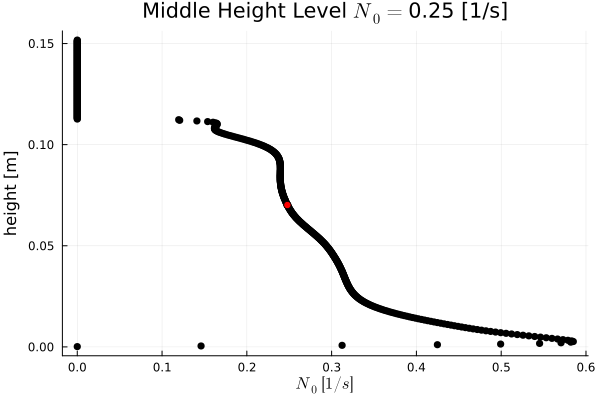

In [4]:
# compute and plot
N0_test = computeN0(T);
scatter(N0_test, -gridZ, mc=:black, legend = false)
scatter!((N0_test[zMiddle], -gridZ[zMiddle]), mc=:red, legend = false)
ylabel!("height [m]")
xlabel!(L"N_0~[1/s]")
title!(join(["Middle Height Level ", L"N_0 = ", string(round(N0_test[zMiddle], sigdigits=2)), " [1/s]"]))

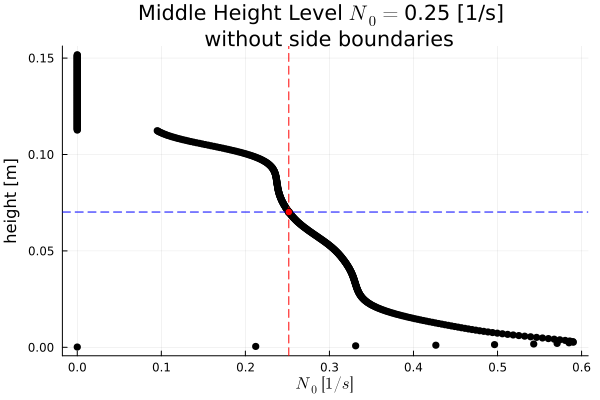

In [5]:
# compute and plot without the side boundaries
N0 = computeN0_boundary(T)
scatter(N0, -gridZ, mc = :black, legend = false)
hline!([-gridZ[zMiddle]], lc = :blue, ls = :dash, legend = false)
vline!([N0[zMiddle]], lc = :red, ls = :dash, legend = false)
scatter!((N0[zMiddle], -gridZ[zMiddle]), mc = :red, legend = false)
ylabel!("height [m]")
xlabel!(L"N_0~[1/s]")
title!(join(["Middle Height Level ", L"N_0 = ", string(round(N0[zMiddle], sigdigits=2)), " [1/s] \n without side boundaries"]))